# Task 3: Exploratory Data Analysis on Dataset - Terrorism

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r"C:\Users\prajwal\Downloads\globalterrorismdb_0718dist.csv", encoding_errors= 'replace')

In [13]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [23]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group']]

In [16]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'Casualities'],
      dtype='object', length=136)

In [24]:
df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown


In [25]:
df.shape

(181691, 14)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Casualities  164817 non-null  float64
 12  Target       181055 non-null  object 
 13  Group        181691 non-null  object 
dtypes: float64(5), int64(3), object(6)
memory usage: 19.4+ MB


Data Cleaning
Filling the missing values with Mean or Mode

In [27]:
df['City'].fillna(df['City'].value_counts().index[1],inplace=True)
df['latitude'].fillna(df['latitude'].value_counts().index[0],inplace=True)
df['longitude'].fillna(df['longitude'].value_counts().index[0],inplace=True)
df['Killed'].fillna(df['Killed'].value_counts().index[0],inplace=True)
df['Wounded'].fillna(df['Wounded'].value_counts().index[0],inplace=True)
df['Casualities'].fillna(df['Casualities'].value_counts().index[0],inplace=True)
df['Target'].fillna(df['Target'].value_counts().index[0],inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181691 non-null  object 
 6   latitude     181691 non-null  float64
 7   longitude    181691 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       181691 non-null  float64
 10  Wounded      181691 non-null  float64
 11  Casualities  181691 non-null  float64
 12  Target       181691 non-null  object 
 13  Group        181691 non-null  object 
dtypes: float64(5), int64(3), object(6)
memory usage: 19.4+ MB


In [29]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.744214,-4.460782e+02,2.266860,2.883296,4.804267
std,13.259430,3.388303,8.814045,18.398930,2.021946e+05,11.227057,34.309747,40.097379
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.849620,6.655000e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.633078,4.364658e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.538561,6.835734e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [30]:
df.describe(include='O')

,Country,Region,City,AttackType,Target,Group
count,181691,181691,181691,181691,181691,181691
unique,205,12,36674,9,86006,3537
top,Iraq,Middle East & North Africa,Unknown,Bombing/Explosion,Civilians,Unknown
freq,24636,50474,9775,88255,7097,82782


In [31]:
df['Country'].value_counts().index[0]

'Iraq'

In [32]:
df['City'].value_counts().index[1]

'Baghdad'

In [33]:
pd.DataFrame({'Title': ['Country with most attacks','City with most attacks',"Region with the most attacks",
                            "Year with the most attacks","Month with the most attacks",
                            "Group with the most attacks","Most Attack Types"],
                  'Values' : [str(df['Country'].value_counts().index[0]),str(df['City'].value_counts().index[1]),
                              str(df['Region'].value_counts().index[0]),str(df['Year'].value_counts().index[0]),
                              str(df['Month'].value_counts().index[0]),str(df['Group'].value_counts().index[1]),
                              str(df['AttackType'].value_counts().index[0])]})

,Title,Values
0,Country with most attacks,Iraq
1,City with most attacks,Baghdad
2,Region with the most attacks,Middle East & North Africa
3,Year with the most attacks,2014
4,Month with the most attacks,5
5,Group with the most attacks,Taliban
6,Most Attack Types,Bombing/Explosion


Correlation between different Numerical Data

<AxesSubplot:>

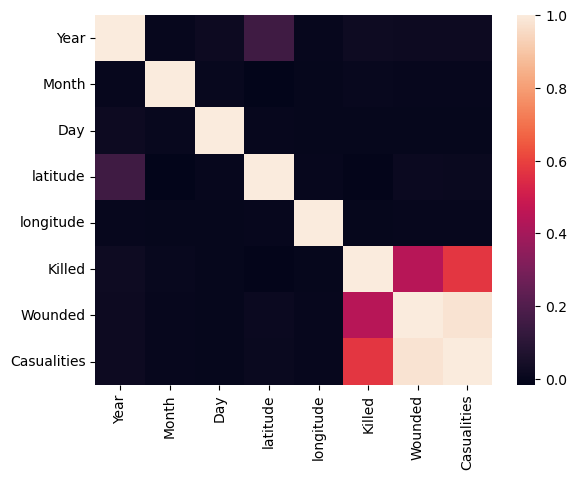

In [34]:
sns.heatmap(df.corr())

TERROR COUNTS VS YEARS

In [40]:
print('Countries with most Terror')
pd.DataFrame(df['Country'].value_counts().head(5))

Countries with most Terror


,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


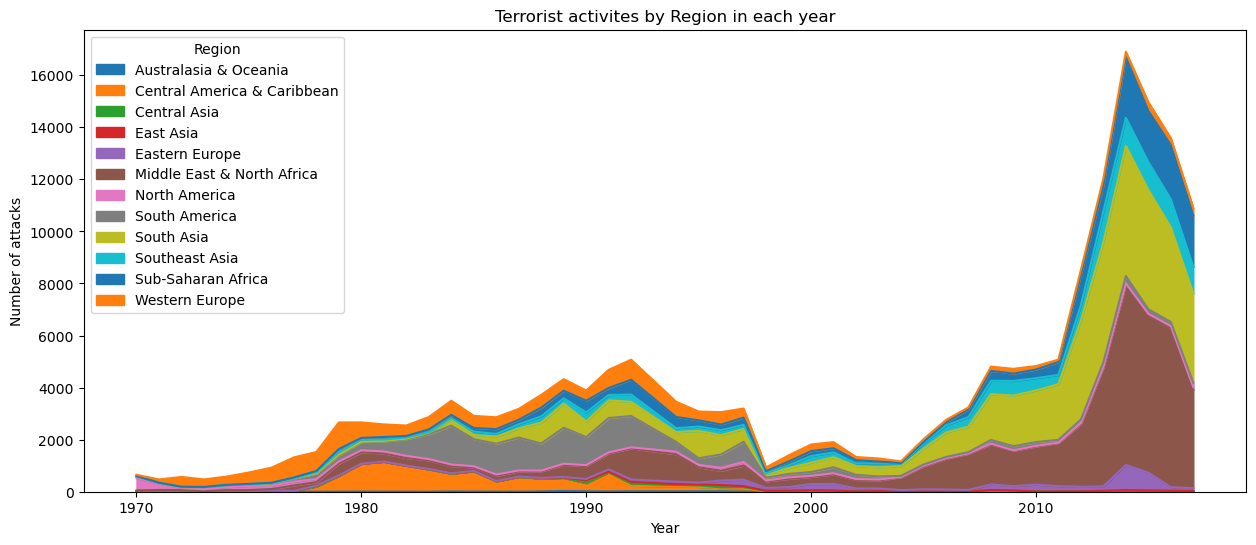

In [41]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

In [42]:
casuality_by_group = pd.DataFrame(df.groupby('Group')['Casualities'].sum())
casuality_by_group.reset_index(inplace=True)
top_5_groups = casuality_by_group.sort_values(by='Casualities',ascending=False)[1:6]
top_5_groups

,Group,Casualities
1535,Islamic State of Iraq and the Levant (ISIL),58223.0
3138,Taliban,54459.0
161,Al-Qaida,28340.0
1864,Liberation Tigers of Tamil Eelam (LTTE),20859.0
704,Boko Haram,20305.0
